### Problem 1
Generate two sine signals with different frequencies and phases. Generate linear combination of these signals, add small gaussian noise. Use FFT to find base frequencies used in the combined signal.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
#matplotlib inline

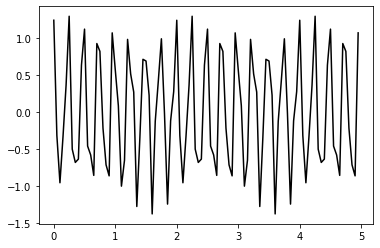

In [2]:
t = np.arange(0, 5, 0.05)
s = np.sin(4*2*np.pi*t+2) + 0.4*np.sin(8.5*2*np.pi*t+1)
plt.plot(t, s, 'k-')
plt.show()

In [3]:
#s_ext = np.hstack((s, np.zeros(150)))
f = np.fft.fft(s)
af = np.abs(f)

In [4]:
freqs = np.fft.fftfreq(n=s.shape[0], d=(t[1]-t[0]))

<BarContainer object of 50 artists>

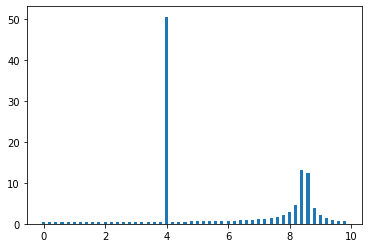

In [5]:
plt.bar(freqs[:af.shape[0]//2], af[:af.shape[0]//2], width=0.1)

### Problem 2
Generate a sine wave with high frequency noise. Plot the spectrum of the signal. Filter the signal with moving average with different sizes of the window, plot the spectrum and filtered signal. 

In [6]:
import numpy as np
import matplotlib.pyplot as plt
#matplotlib inline

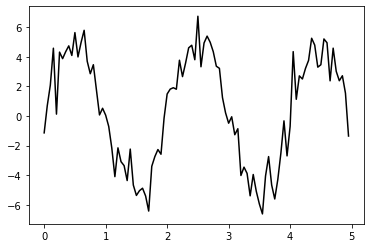

In [7]:
t = np.arange(0, 5, 0.05)
s = 5*np.sin(0.5*2*np.pi*t) + np.random.randn(t.shape[0])
plt.plot(t, s, 'k-')
plt.show()

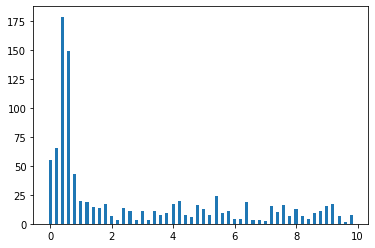

In [8]:
af = np.abs(np.fft.fft(s))
freqs = np.fft.fftfreq(n=s.shape[0], d=(t[1]-t[0]))
plt.bar(freqs[:af.shape[0]//2], af[:af.shape[0]//2], width=0.1)
plt.show()

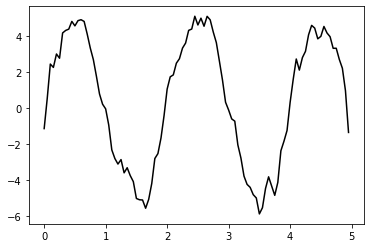

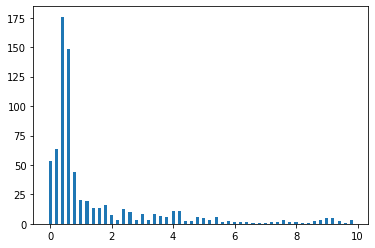

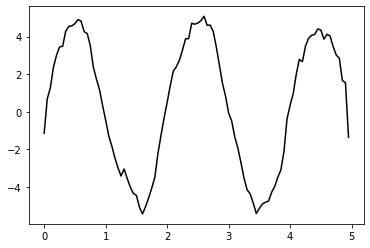

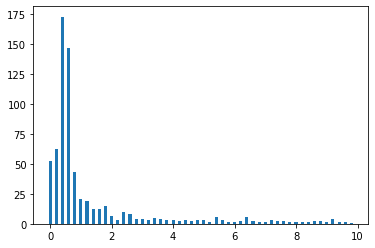

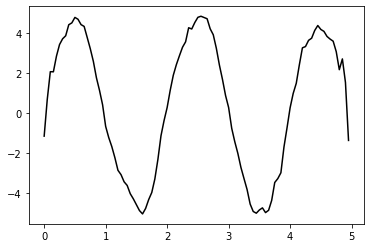

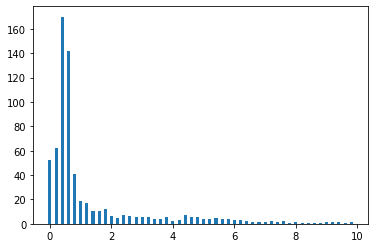

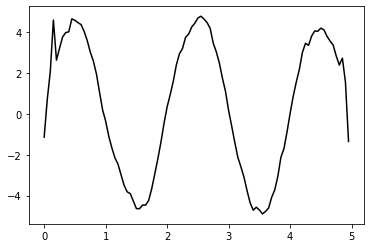

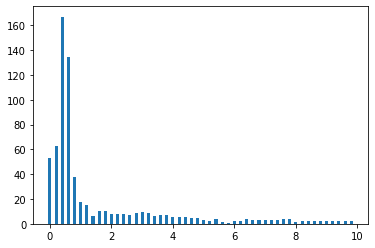

In [9]:
for w in range(1, 5):
    new_s = s.copy()
    for i in range(w,s.shape[0]-w):
        new_s[i] = np.mean(s[i-w:i+w+1])
    plt.plot(t, new_s, 'k-')
    plt.show()
    af = np.abs(np.fft.fft(new_s))
    freqs = np.fft.fftfreq(n=new_s.shape[0], d=(t[1]-t[0]))
    plt.bar(freqs[:af.shape[0]//2], af[:af.shape[0]//2], width=0.1)
    plt.show()

### Problem 3
Read the image (any image, for instance `skimage.data.camera()`) as a grayscale image, perform low-pass filtering by performing FFT, zeroing-out all frequencies but small ones and performing inverse FFT. Plot original image, filtered image and amplitude of fft.

Useful functions: `np.fft.fft2`, `np.fft.fftshift`, `np.fft.ifft2`

In [10]:
import numpy as np
import skimage as si

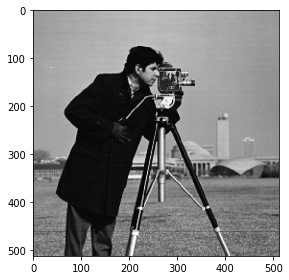

In [17]:
img = si.data.camera()/255
si.io.imshow(img)
plt.show()

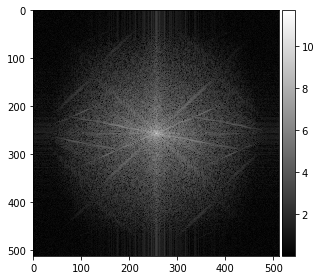

In [19]:
# calculating fft transform
mf = np.fft.fftshift(np.fft.fft2(img))
si.io.imshow(np.log(1+np.abs(mf)), cmap = 'gray')

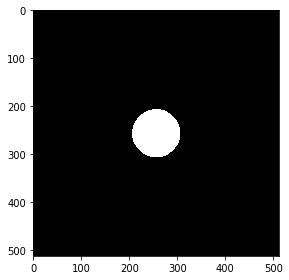

In [21]:
# creating mask

sigma = 50
m, n = mf.shape[0], mf.shape[1]

mask = np.zeros(mf.shape)
for i in range(m):
    for j in range(n):
        if (i-m/2)**2 + (j-n/2)**2 < sigma**2:
            mask[i,j] = 1

si.io.imshow(mask, cmap='gray')

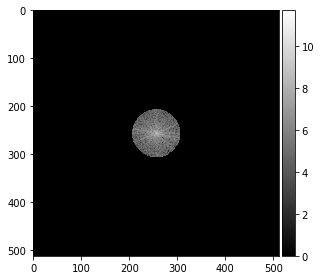

In [22]:
masked_mf = mf*mask

si.io.imshow(np.log(1+np.abs(masked_mf)), cmap = 'gray')

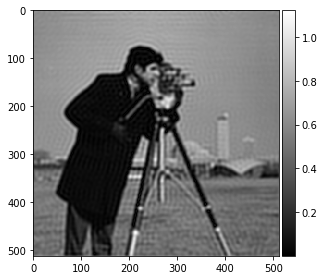

In [23]:
blurred_image = np.fft.ifft2(masked_mf)

si.io.imshow(np.abs(blurred_image), cmap = 'gray')

# note ringing effect around objects
# this effect is due to sharp mask

### Problem 4
Load an image (any image, for instance `skimage.data.camera()`) and add salt-and-pepper noise. Implement a mean and median filters. Show the image filtered with both filters.